<a href="https://colab.research.google.com/github/YuHsiH/freecodecamp_ML/blob/main/fcc_bike_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
import copy
import seaborn as sns
import tensorflow as tf
from sklearn.linear_model import LinearRegression


#Dataset
UCI Machine learning Repositry

https://archive.ics.uci.edu/dataset/560/seoul+bike+sharing+demand


In [32]:
cols=['bike_count','hour','temp', 'humidity', 'wind', 'visibility', 'dew_pt_temp', 'radiation', 'rain', 'Snow', 'functional']
df=pd.read_csv('SeoulBikeData.csv').drop(['Date','Seasons','Holiday'],axis=1)


In [33]:
df.head()

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Functioning Day
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Yes
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Yes
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Yes
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Yes
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Yes


In [34]:
df.columns=cols
df['functional']=(df['functional']=='Yes').astype(int)
df=df[df['hour']==12] #using a certain time
df=df.drop(['hour'],axis=1)

In [35]:
df.head()

,bike_count,temp,humidity,wind,visibility,dew_pt_temp,radiation,rain,Snow,functional
12,449,1.7,23,1.4,2000,-17.2,1.11,0.0,0.0,1
36,479,4.3,41,1.3,1666,-7.8,1.09,0.0,0.0,1
60,333,5.8,85,1.7,349,3.4,0.43,0.0,0.0,1
84,393,-0.3,38,4.8,1823,-12.9,1.11,0.0,0.0,1
108,321,-2.3,25,0.0,1962,-19.7,0.00,0.0,0.0,1


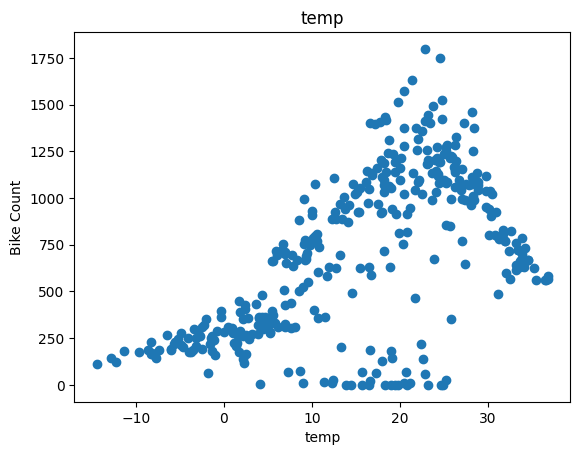

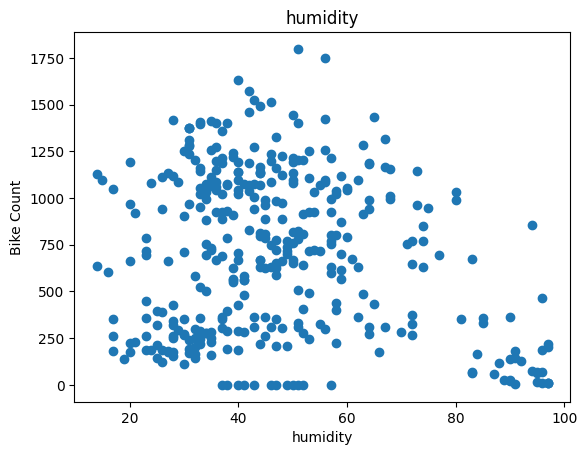

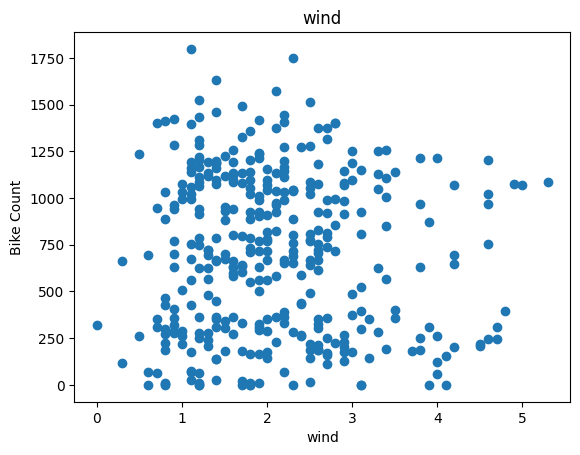

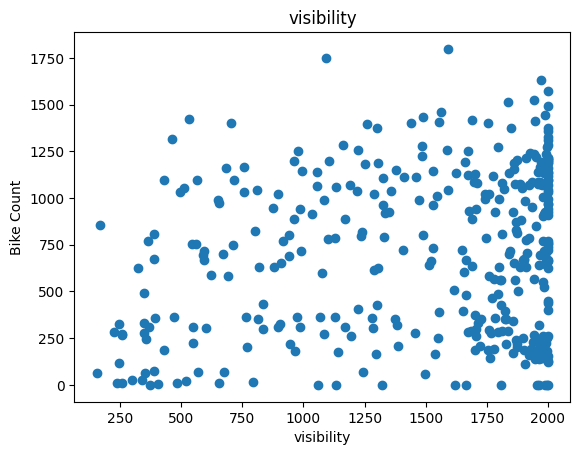

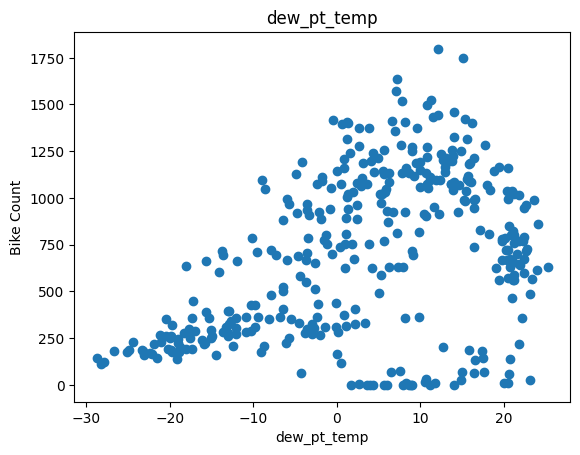

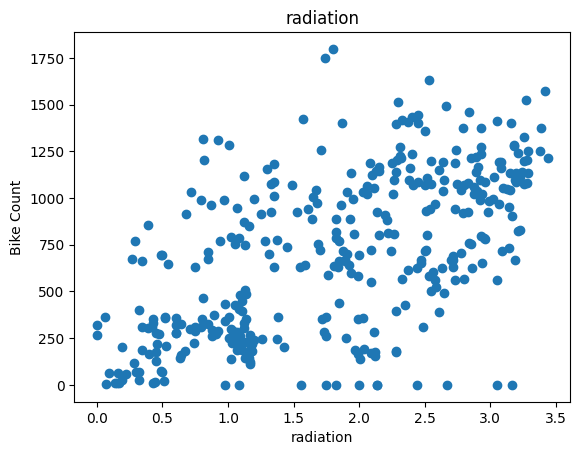

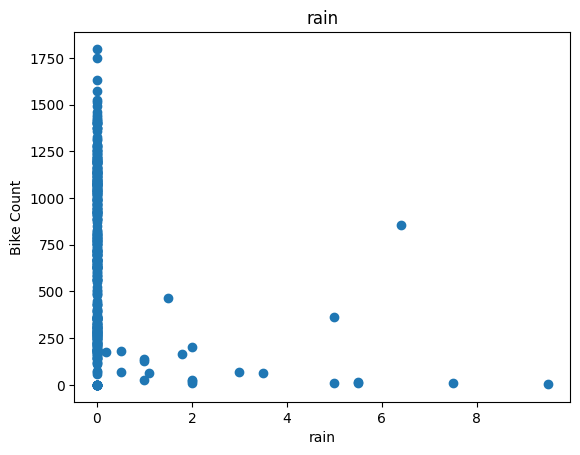

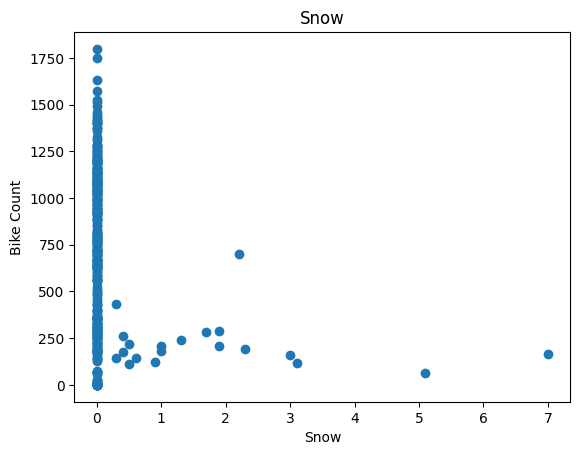

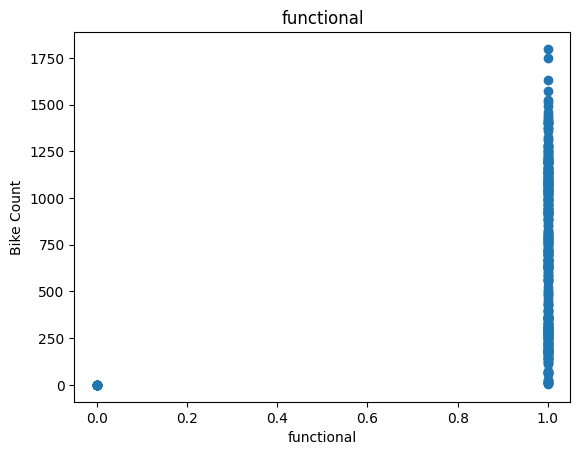

In [36]:
for label in df.columns[1:]:
  plt.scatter(df[label],df['bike_count'])
  plt.title(label)
  plt.ylabel('Bike Count')
  plt.xlabel(label)
  plt.show()

In [37]:
df=df.drop(['wind','visibility','functional'],axis=1)
df.head()

,bike_count,temp,humidity,dew_pt_temp,radiation,rain,Snow
12,449,1.7,23,-17.2,1.11,0.0,0.0
36,479,4.3,41,-7.8,1.09,0.0,0.0
60,333,5.8,85,3.4,0.43,0.0,0.0
84,393,-0.3,38,-12.9,1.11,0.0,0.0
108,321,-2.3,25,-19.7,0.00,0.0,0.0


# Train/Valid/test dataset

In [67]:
def get_xy(dataframe, y_label, x_labels= None):
  dataframe=copy.deepcopy (dataframe) # copy everything
  if x_labels is None:
    x=dataframe[[c for c in dataframe.columns if c!=y_label]].values #take all the columns
  else:
    if len(x_labels)==1:
      x=dataframe[x_labels[0]].values.reshape(-1,1) #reshape to make it 2D
    else:
      x=dataframe[x_labels].values

  y=dataframe[y_label].values.reshape(-1,1)
  data=np.hstack((x,y)) # stack horizontally

  return data, x, y

#Single Learn regression

In [83]:
train, valid, test =np.split(df.sample(frac=1), [int(0.6*len(df)),int(0.8*len(df))])

In [79]:
_, x_train_temp, y_train_temp=get_xy(train,'bike_count',x_labels=['temp'])
_, x_valid_temp, y_valid_temp=get_xy(valid,'bike_count',x_labels=['temp'])
_, x_test_temp, y_test_temp=get_xy(test,'bike_count',x_labels=['temp'])

In [85]:
temp_reg=LinearRegression()
temp_reg.fit(x_train_temp,y_train_temp)

LinearRegression()

In [86]:
print(temp_reg.coef_, temp_reg.intercept_)

[[21.16348855]] [380.90457389]


In [87]:
temp_reg.score(x_test_temp,y_test_temp)

0.26194251621781206

Text(0.5, 0, 'Temp')

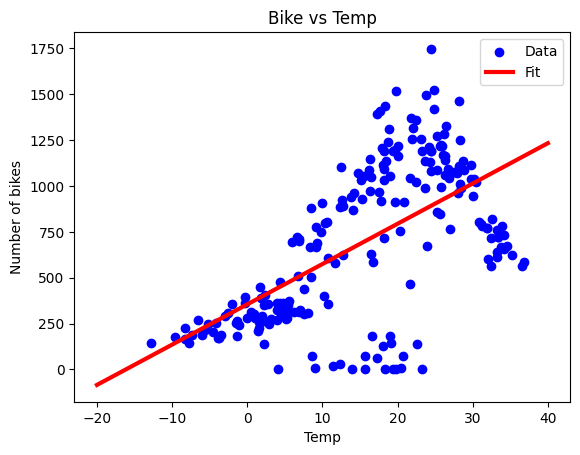

In [53]:
plt.scatter(x_train_temp,y_train_temp, label='Data', color='blue')
x=tf.linspace(-20,40,100)
plt.plot(x, temp_reg.predict(np.array(x).reshape(-1,1)), label='Fit',color='red',linewidth=3)
plt.legend()
plt.title('Bike vs Temp')
plt.ylabel('Number of bikes')
plt.xlabel('Temp')

#Multiple Linear Regression

In [91]:
train, valid, test =np.split(df.sample(frac=1), [int(0.6*len(df)),int(0.8*len(df))]) #df.sample: shuffle the data
_, x_train_all, y_train_all=get_xy(train,'bike_count',x_labels=df.columns[1:])
_, x_valid_all, y_valid_all=get_xy(valid,'bike_count',x_labels=df.columns[1:])
_, x_test_all, y_test_all=get_xy(test,'bike_count',x_labels=df.columns[1:])

In [92]:
all_reg=LinearRegression()
all_reg.fit(x_train_all,y_train_all)

LinearRegression()

In [93]:
all_reg.score(x_test_all,y_test_all)

0.44670703402378276

# Linear Regression with Neural Net

In [97]:
temp_normalizer=tf.keras.layers.experimental.preprocessing.Normalization(input_shape=(1,),axis=None)
temp_normalizer.adapt(x_train_temp.reshape(-1))

In [103]:
nn_model_temp=tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(1)
])

In [106]:
nn_model_temp.compile(optimizer=tf.keras.optimizers.experimental.Adam(0.1),loss='MSE')

In [110]:
history=nn_model_temp.fit(
    x_train_temp.reshape(-1),
    y_train_temp,
    epochs=100,
    validation_data=(x_valid_temp,y_valid_temp)

)

Epoch 1/100
7/7 [==============================] - 2s 99ms/step - loss: 678037.7500 - val_loss: 649986.5625
Epoch 2/100
7/7 [==============================] - 0s 32ms/step - loss: 676755.1875 - val_loss: 648703.5625
Epoch 3/100
7/7 [==============================] - 0s 21ms/step - loss: 675459.3750 - val_loss: 647419.3750
Epoch 4/100
7/7 [==============================] - 0s 22ms/step - loss: 674142.6875 - val_loss: 646146.3125
Epoch 5/100
7/7 [==============================] - 0s 18ms/step - loss: 672942.8125 - val_loss: 644837.6875
Epoch 6/100
7/7 [==============================] - 0s 13ms/step - loss: 671612.4375 - val_loss: 643559.6875
Epoch 7/100
7/7 [==============================] - 0s 14ms/step - loss: 670331.6875 - val_loss: 642281.5000
Epoch 8/100
7/7 [==============================] - 0s 19ms/step - loss: 669032.9375 - val_loss: 641014.3125
Epoch 9/100
7/7 [==============================] - 0s 14ms/step - loss: 667743.2500 - val_loss: 639750.6250
Epoch 10/100
7/7 [==========

In [111]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('MSE')
  plt.legend()
  plt.grid(True)
  plt.show

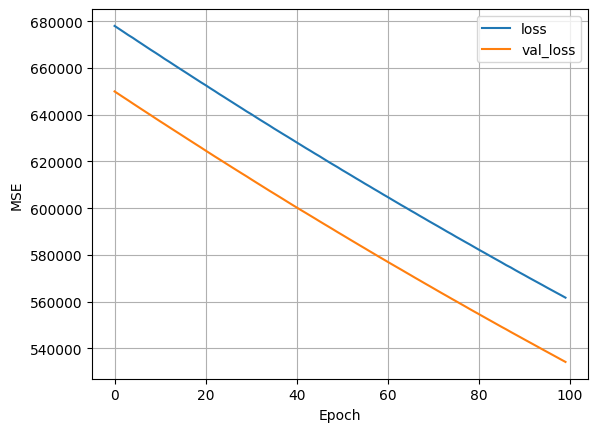

In [112]:
plot_loss(history)

#Neural Net with Temp data

In [115]:
nn_model = tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='relu')
])

nn_model.compile(optimizer=tf.keras.optimizers.experimental.Adam(0.005),loss='MSE')

In [116]:
history=nn_model.fit(
    x_train_temp,
    y_train_temp,
    validation_data=(x_valid_temp,y_valid_temp),
    epochs=100
)

Epoch 1/100
7/7 [==============================] - 2s 94ms/step - loss: 678376.1875 - val_loss: 650659.3125
Epoch 2/100
7/7 [==============================] - 0s 28ms/step - loss: 677523.1875 - val_loss: 649606.6250
Epoch 3/100
7/7 [==============================] - 0s 18ms/step - loss: 676174.4375 - val_loss: 647847.3125
Epoch 4/100
7/7 [==============================] - 0s 29ms/step - loss: 673816.8125 - val_loss: 644900.8125
Epoch 5/100
7/7 [==============================] - 0s 29ms/step - loss: 670035.8750 - val_loss: 640111.8125
Epoch 6/100
7/7 [==============================] - 0s 22ms/step - loss: 664162.6875 - val_loss: 632712.5625
Epoch 7/100
7/7 [==============================] - 0s 20ms/step - loss: 655376.6875 - val_loss: 621978.3125
Epoch 8/100
7/7 [==============================] - 0s 19ms/step - loss: 642631.8125 - val_loss: 607005.5625
Epoch 9/100
7/7 [==============================] - 0s 23ms/step - loss: 625141.1250 - val_loss: 586698.1875
Epoch 10/100
7/7 [==========

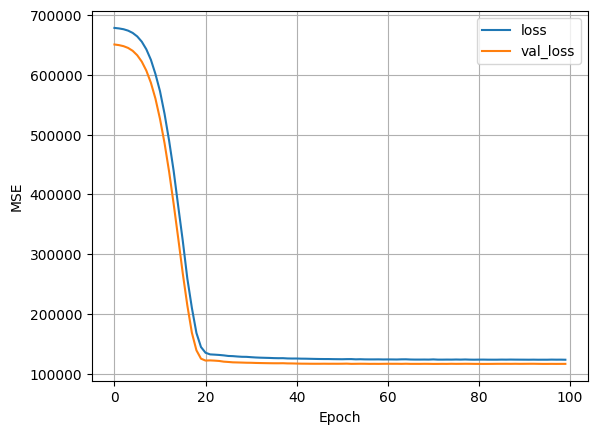

In [117]:
plot_loss(history)

4/4 [==============================] - 0s 5ms/step


Text(0.5, 0, 'Temp')

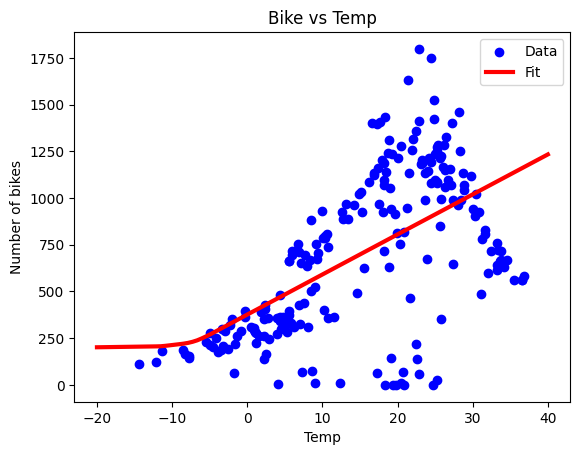

In [118]:
plt.scatter(x_train_temp,y_train_temp, label='Data', color='blue')
x=tf.linspace(-20,40,100)
plt.plot(x, nn_model.predict(np.array(x).reshape(-1,1)), label='Fit',color='red',linewidth=3)
plt.legend()
plt.title('Bike vs Temp')
plt.ylabel('Number of bikes')
plt.xlabel('Temp')

# All data with NN


In [134]:
normalizer=tf.keras.layers.experimental.preprocessing.Normalization(input_shape=(6,),axis=None)
normalizer.adapt(x_train_all)

In [135]:
nn_model_all = tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='relu')
])

nn_model_all.compile(optimizer=tf.keras.optimizers.experimental.Adam(0.005),loss='MSE')

In [136]:
history=nn_model_all.fit(
    x_train_all,
    y_train_all,
    validation_data=(x_valid_all,y_valid_all),
    epochs=100
)

Epoch 1/100
7/7 [==============================] - 2s 58ms/step - loss: 686131.3125 - val_loss: 640680.6875
Epoch 2/100
7/7 [==============================] - 0s 14ms/step - loss: 679810.5625 - val_loss: 632313.6875
Epoch 3/100
7/7 [==============================] - 0s 14ms/step - loss: 668099.4375 - val_loss: 617711.5000
Epoch 4/100
7/7 [==============================] - 0s 14ms/step - loss: 648498.0625 - val_loss: 594149.8125
Epoch 5/100
7/7 [==============================] - 0s 16ms/step - loss: 617771.6250 - val_loss: 558742.3750
Epoch 6/100
7/7 [==============================] - 0s 15ms/step - loss: 574084.3750 - val_loss: 509326.0312
Epoch 7/100
7/7 [==============================] - 0s 16ms/step - loss: 513701.5625 - val_loss: 446351.5625
Epoch 8/100
7/7 [==============================] - 0s 12ms/step - loss: 439535.8125 - val_loss: 374491.8750
Epoch 9/100
7/7 [==============================] - 0s 13ms/step - loss: 358318.4688 - val_loss: 304496.2812
Epoch 10/100
7/7 [==========

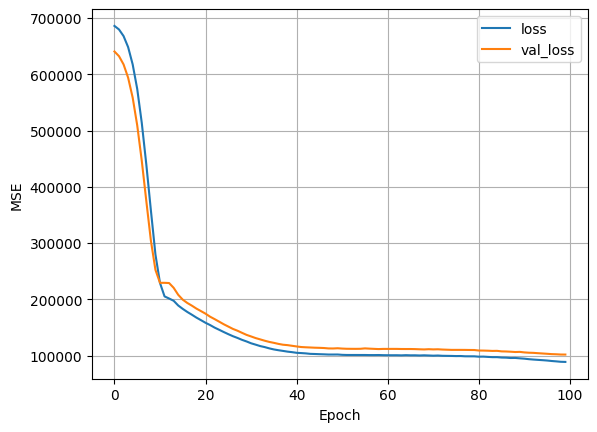

In [137]:
plot_loss(history)

In [138]:
#Calculate the MSE for both linear reg and nn
y_pred_linear=all_reg.predict(x_test_all)
y_pred_nn=nn_model_all.predict(x_test_all)

3/3 [==============================] - 0s 4ms/step


In [139]:
def MSE(y_pred, y_real):
  return (np.square(y_pred-y_real)).mean()

In [140]:
MSE(y_pred_linear,y_test_all)

100476.91680070719

In [141]:
MSE(y_pred_nn,y_test_all)

103983.66835577814

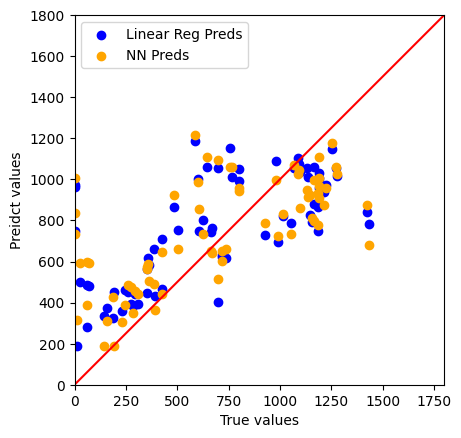

In [146]:
ax= plt.axes(aspect='equal')
plt.scatter(y_test_all,y_pred_linear,label='Linear Reg Preds',c='b')
plt.scatter(y_test_all,y_pred_nn,label='NN Preds',c='orange')
plt.xlabel('True values')
plt.ylabel('Preidct values')
plt.legend()
lims=[0,1800]
plt.xlim(lims)
plt.ylim(lims)
_=plt.plot(lims,lims, c='r')